Import Required Libraries

In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


Load Dataset

In [133]:
df = pd.read_csv('train.csv')
print(df.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

Handle Missing Values

In [134]:
# Show missing values
print(df.isnull().sum())
# Fill with mode
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term']:
    df[col] = df[col].fillna(df[col].mode()[0])
# Fill numerical NaNs with median
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


**Visualize Key Features**

LoanAmount Distribution

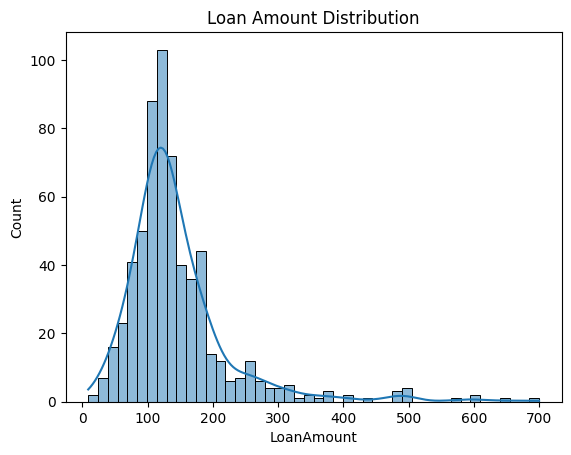

In [135]:
sns.histplot(df['LoanAmount'], kde=True)
plt.title("Loan Amount Distribution")
plt.show()


Education vs Loan_Status

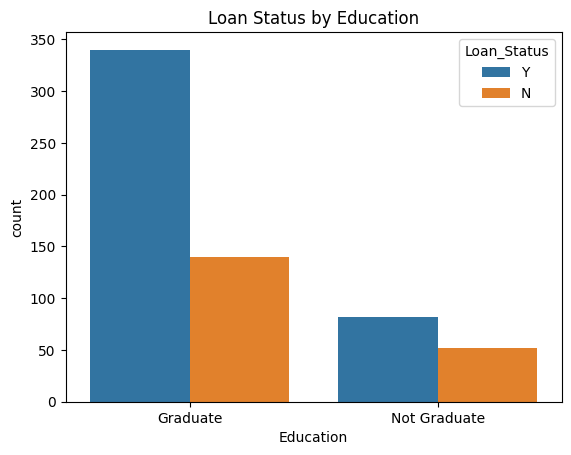

In [136]:
sns.countplot(data=df, x='Education', hue='Loan_Status')
plt.title("Loan Status by Education")
plt.show()


Income Distribution

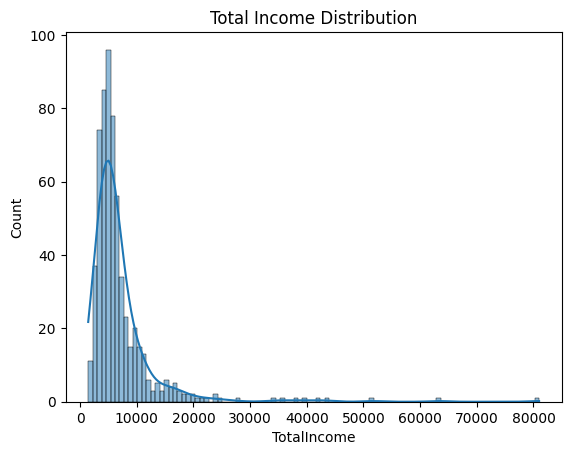

In [129]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
sns.histplot(df['TotalIncome'], kde=True)
plt.title("Total Income Distribution")
plt.show()


Income vs Loan_Status

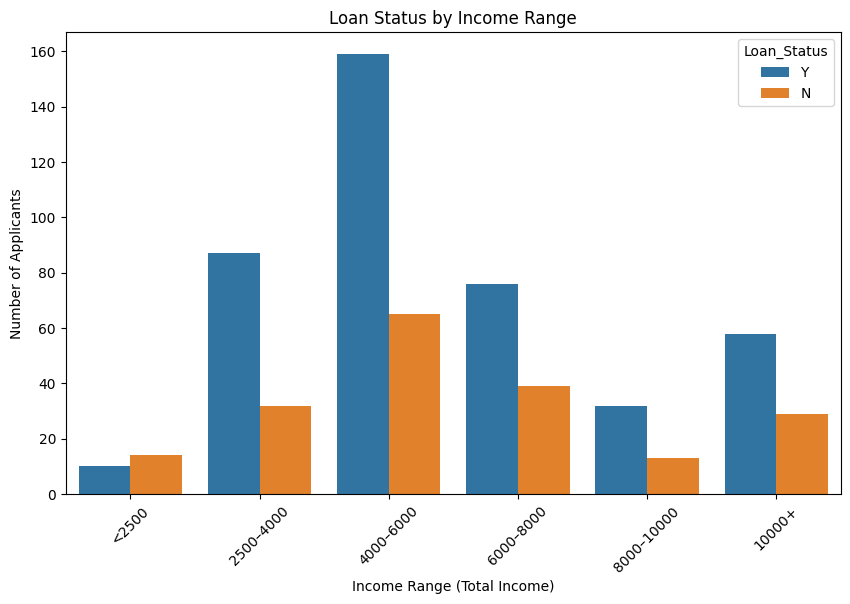

In [131]:
bins = [0, 2500, 4000, 6000, 8000, 10000, df['TotalIncome'].max()]
labels = ['<2500', '2500–4000', '4000–6000', '6000–8000', '8000–10000', '10000+']
df['IncomeBin'] = pd.cut(df['TotalIncome'], bins=bins, labels=labels)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='IncomeBin', hue='Loan_Status')
plt.title('Loan Status by Income Range')
plt.xlabel('Income Range (Total Income)')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=45)
plt.show()


**Preprocess Data**

Label Encoding

In [89]:
cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status', 'Dependents']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

Select Features & Target

In [92]:
X = df[['Credit_History', 'Education', 'LoanAmount', 'TotalIncome']]
y = df['Loan_Status']

Train-Test Split

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Model Training**

Logistic Regression

In [93]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

Decision Tree

In [94]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

**Model Evaluation**

Accuracy Scores

In [95]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_preds))

Logistic Regression Accuracy: 0.7886178861788617
Decision Tree Accuracy: 0.6910569105691057


Confusion Matrices

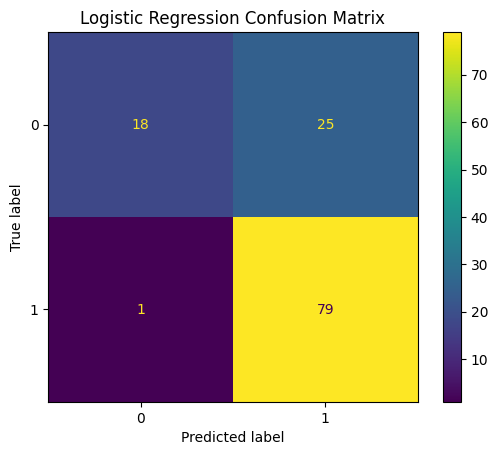

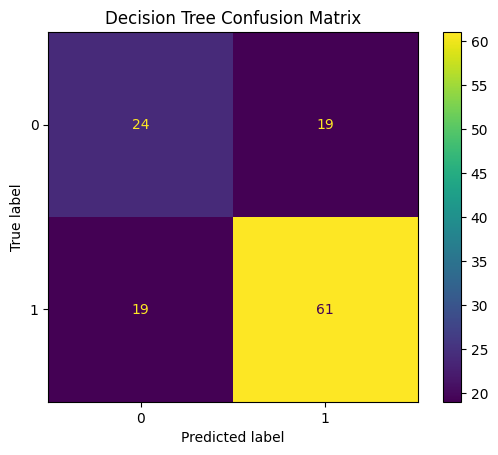

In [96]:
# Logistic Regression
ConfusionMatrixDisplay.from_predictions(y_test, lr_preds)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Decision Tree
ConfusionMatrixDisplay.from_predictions(y_test, dt_preds)
plt.title("Decision Tree Confusion Matrix")
plt.show()